In [3]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [31]:
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import scipy
# from nxcals.api.extraction.data.builders import *
import matplotlib
from matplotlib import cm
import os
from matplotlib.patches import Rectangle

In [80]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

In [20]:
d = {'timestamp': [], 'samples': [], "selector": []}
dfb = pd.DataFrame(data=d)

for root, dirs, files in os.walk('bfield', topdown=False):
    for name in files:
        filename = os.path.join(root, name)
        print(filename)
        with open(filename, 'rb') as f:
            dfb_inter = pickle.load(f)
        dfb = pd.concat([dfb,dfb_inter])
dfb.sort_values(by=["timestamp"], inplace=True)
dfb.reset_index(drop=True, inplace=True)
dfb["sum"] = dfb.samples.apply(lambda x: x.sum())
dfb.drop(dfb[dfb["sum"] < 1e7].index, inplace=True)
dfb.drop(dfb[dfb.samples.apply(lambda x: len(x)) != 24000].index, inplace=True)
dfb["timestamp"] = dfb["timestamp"]/1000000000
dfb["timestamp"] = [datetime.fromtimestamp(x) for x in dfb["timestamp"]]
dfb["flattop"] = dfb.samples.apply(lambda x: x[15000])

bfield/2022_11_23_12_00.pickle
bfield/2022_11_23_15_00.pickle
bfield/2022_11_23_18_00.pickle
bfield/2022_11_23_21_00.pickle
bfield/2022_11_24_00_00.pickle
bfield/2022_11_24_03_00.pickle
bfield/2022_11_24_06_00.pickle
bfield/2022_11_24_09_00.pickle
bfield/2022_11_24_12_00.pickle
bfield/2022_11_24_15_00.pickle
bfield/2022_11_24_18_00.pickle
bfield/2022_11_24_21_00.pickle
bfield/2022_11_25_00_00.pickle
bfield/2022_11_25_03_00.pickle
bfield/2022_11_25_06_00.pickle
bfield/2022_11_25_09_00.pickle
bfield/2022_11_25_12_00.pickle
bfield/2022_11_25_15_00.pickle
bfield/2022_11_25_18_00.pickle
bfield/2022_11_25_21_00.pickle
bfield/2022_11_26_00_00.pickle
bfield/2022_11_26_03_00.pickle
bfield/2022_11_26_06_00.pickle
bfield/2022_11_26_09_00.pickle
bfield/2022_11_26_12_00.pickle
bfield/2022_11_26_15_00.pickle
bfield/2022_11_26_18_00.pickle
bfield/2022_11_26_21_00.pickle
bfield/2022_11_27_00_00.pickle
bfield/2022_11_27_03_00.pickle
bfield/2022_11_27_06_00.pickle
bfield/2022_11_27_09_00.pickle
bfield/2

In [86]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,6))

t = np.arange(0, 24000/10, 0.1)

for user in ["CPS.USER.EAST4","CPS.USER.EAST3","CPS.USER.MD5"]:
    ax.plot(t, np.sum(dfb.where(dfb.selector == user).dropna().reset_index().samples)/len(dfb.where(dfb.selector == user).dropna().reset_index().samples), label=user, lw=3, zorder=99)
ax.axhline(3102, ls="--", c="k", alpha=0.2)
ax.axhline(2566, ls="--", c="k", alpha=0.2)
ax.axhline(2343, ls="--", c="k", alpha=0.2)
ax.axhline(684, ls="--", c="k", alpha=0.2)

# RFKO
rect = Rectangle((1260, 0), 1759-1260, 5000, facecolor='green', alpha=0.2)
ax.add_patch(rect)

ax.text(x=100, y=1000, s="Injection", fontsize=14, bbox=dict(facecolor='w', alpha=1., boxstyle="round"))
ax.text(x=1300, y=3400, s="Slow extraction", fontsize=14, bbox=dict(facecolor='w', alpha=1., boxstyle="round"))

ax.legend()
ax.set_yticks([0, 684, 2343, 2566, 3102])
ax.set_ylabel("B-field [G]")
ax.set_xlim(0,2400)
ax.set_ylim(0, 4500)
ax.set_xlabel("Time [ms]")
ax.set_title("Average B-field in the PS main bending magnets\nCHIMERA nov 2022 run")
plt.savefig("fig/average_b_field_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

In [82]:
fig, ax = plt.subplots()
dfb_u = dfb.where( (dfb.selector == "CPS.USER.EAST3") | (dfb.selector == "CPS.USER.EAST4") | (dfb.selector == "CPS.USER.MD5")).dropna().reset_index()
ax.hist(dfb_u.samples.apply(lambda x: x[15000]), bins = 50);
ax.set_title("Histogram of B-field at flatop\nCHIMERA nov 2022 run")
ax.set_xlabel("B-field [G]")
plt.savefig("fig/hist_b_field_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

In [83]:
fig, ax = plt.subplots(tight_layout=True, figsize=(30, 5))

for user in ["CPS.USER.EAST4","CPS.USER.EAST3","CPS.USER.MD5"]:
    dfb_u = dfb.where(dfb.selector == user)
    ax.plot(dfb_u.timestamp, dfb_u.flattop/dfb_u.flattop.mean(), alpha=0.33, label=user)

ax.tick_params(axis='x', rotation=90)
ax.legend()
ax.set_title("Variation around the mean B-field at flatop at data index 15000\nCHIMERA nov 2022 run")
ax.set_ylabel(r"$B_{field}\; /\; \overline{B_{field}}$")
plt.savefig("fig/variation_b_field_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

# User MD6

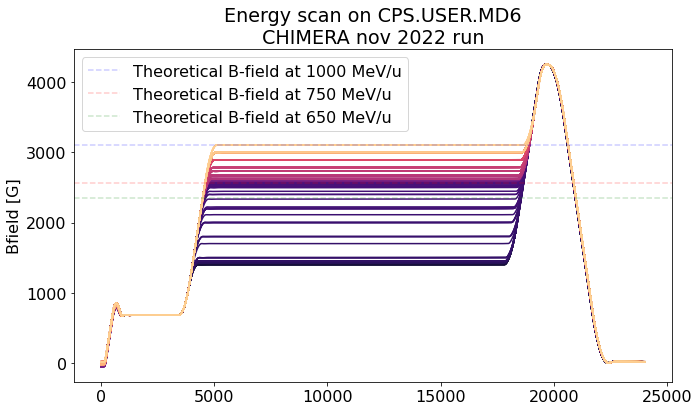

In [89]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,6))

user = "CPS.USER.MD6"
dfb_u = dfb.where((dfb.selector == user)).dropna().reset_index()
dfb_u.sort_values(by=["flattop"], inplace=True)
dfb_u.reset_index(drop=True, inplace=True)
color = iter(cm.magma(np.linspace(0.1, 0.9, len(dfb_u))))
for i in range(len(dfb_u)):
    c = next(color)
    ax.plot(dfb_u.samples[i], alpha=1., color=c)

    
ax.axhline(3102, ls="--", c="b", alpha=0.2, label = "Theoretical B-field at 1000 MeV/u")
ax.axhline(2566, ls="--", c="r", alpha=0.2, label = "Theoretical B-field at 750 MeV/u")
ax.axhline(2343, ls="--", c="g", alpha=0.2, label = "Theoretical B-field at 650 MeV/u")

ax.set_title("Energy scan on CPS.USER.MD6\nCHIMERA nov 2022 run")
ax.set_ylabel("Bfield [G]")
ax.legend()
plt.savefig("fig/energy_scan_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

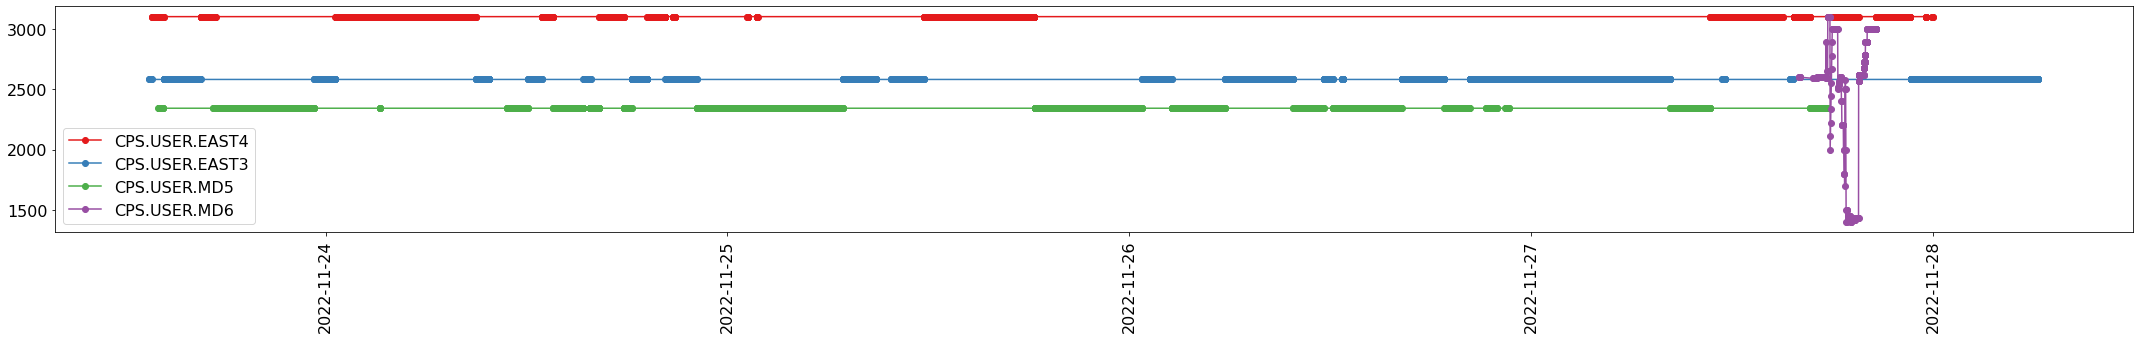

In [90]:
fig, ax = plt.subplots(tight_layout=True, figsize=(30, 5))

for user in ["CPS.USER.EAST4", "CPS.USER.EAST3", "CPS.USER.MD5", "CPS.USER.MD6", ]:
    dfb_u = dfb.where((dfb.selector == user)).dropna().reset_index()
    ax.plot(dfb_u.timestamp, dfb_u.flattop, alpha=1., label=user, marker="o")
    

ax.tick_params(axis='x', rotation=90)
ax.legend()

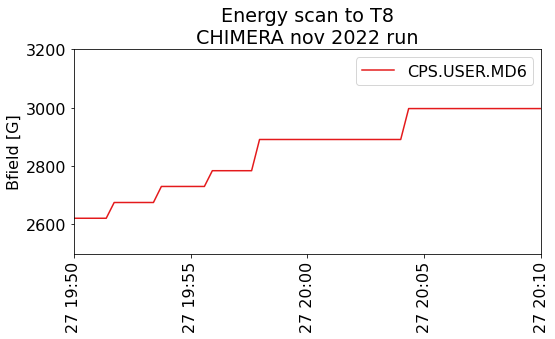

In [91]:
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 5))

for user in ["CPS.USER.MD6"]:
    dfb_u = dfb.where((dfb.selector == user)).dropna().reset_index()
    ax.plot(dfb_u.timestamp, dfb_u.flattop, alpha=1., label=user)

ax.tick_params(axis='x', rotation=90)
ax.legend()
ax.set_xlim([datetime(2022, 11, 27, 19, 50), datetime(2022, 11, 27, 20, 10)])
ax.set_ylim(2500,3200)
ax.set_ylabel("Bfield [G]")
ax.set_title("Energy scan to T8\nCHIMERA nov 2022 run")
plt.savefig("fig/energy_scan_timestamp_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

In [105]:
plt.plot(np.sort(dfb_u.flattop))

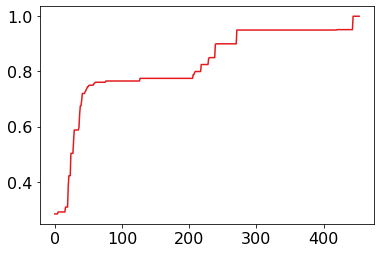

In [129]:
Ekin = (193.737692/208)*(np.sqrt(((1/((3.3356/(70.0789*54)*10000)/np.sort(dfb_u.where(dfb_u.flattop>=1430).flattop)))/193.737692)**2+1)-1)
Ekin = Ekin[~np.isnan(Ekin)]
plt.plot(Ekin)

In [130]:
with open('Ekin_chimera_nov_2022.pickle', 'wb') as handle:
    pickle.dump(Ekin, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
dfb.head(1)

timestamp  \
0 2022-11-23 13:27:24.698238   

                                             samples        selector  \
0  [16.46250020712614, 16.463600331917405, 16.465...  CPS.USER.EAST3   

            sum      flattop  
0  4.968379e+07  2581.525147

In [14]:
dfb

timestamp  \
0     2022-11-23 13:27:24.698238   
1     2022-11-23 13:28:21.098238   
2     2022-11-23 13:29:17.498239   
3     2022-11-23 13:30:13.898238   
4     2022-11-23 13:31:10.298239   
...                          ...   
15263 2022-11-28 06:15:11.498239   
15264 2022-11-28 06:15:40.298239   
15265 2022-11-28 06:16:09.098238   
15266 2022-11-28 06:16:37.898238   
15267 2022-11-28 06:17:06.698238   

                                                 samples        selector  \
0      [16.46250020712614, 16.463600331917405, 16.465...  CPS.USER.EAST3   
1      [16.548699932172894, 16.551000298932195, 16.55...  CPS.USER.EAST3   
2      [16.62170048803091, 16.624899581074715, 16.628...  CPS.USER.EAST3   
3      [16.53649960644543, 16.538200434297323, 16.539...  CPS.USER.EAST3   
4      [16.451800474897027, 16.4535001385957, 16.4551...  CPS.USER.EAST3   
...                                                  ...             ...   
15263  [-13.726099859923124, -13.719500275328755, -13...  CPS.USER.EAST3   
15264  [16.32060040719807, 16.322300070896745, 16.324...  CPS.USER.EAST3   
15265  [-22.771600633859634, -22.76309998705983, -22....  CPS.USER.EAST3   
15266  [16.33830019272864, 16.340899746865034, 16.343...  CPS.USER.EAST3   
15267  [-13.737899716943502, -13.730699429288507, -13...  CPS.USER.EAST3   

                sum      flattop  
0      4.968379e+07  2581.525147  
1      4.968402e+07  2581.552863  
2      4.968402e+07  2581.548095  
3      4.968390e+07  2581.556141  
4      4.968390e+07  2581.545115  
...             ...          ...  
15263  4.965857e+07  2581.558228  
15264  4.968384e+07  2581.557333  
15265  4.965072e+07  2581.557035  
15266  4.968412e+07  2581.542432  
15267  4.965875e+07  2581.566870  

[15203 rows x 5 columns]

In [15]:
dfb.rename(columns={"flattop": "bfield"}).drop(['samples','sum'], axis=1)

timestamp        selector       bfield
0     2022-11-23 13:27:24.698238  CPS.USER.EAST3  2581.525147
1     2022-11-23 13:28:21.098238  CPS.USER.EAST3  2581.552863
2     2022-11-23 13:29:17.498239  CPS.USER.EAST3  2581.548095
3     2022-11-23 13:30:13.898238  CPS.USER.EAST3  2581.556141
4     2022-11-23 13:31:10.298239  CPS.USER.EAST3  2581.545115
...                          ...             ...          ...
15263 2022-11-28 06:15:11.498239  CPS.USER.EAST3  2581.558228
15264 2022-11-28 06:15:40.298239  CPS.USER.EAST3  2581.557333
15265 2022-11-28 06:16:09.098238  CPS.USER.EAST3  2581.557035
15266 2022-11-28 06:16:37.898238  CPS.USER.EAST3  2581.542432
15267 2022-11-28 06:17:06.698238  CPS.USER.EAST3  2581.566870

[15203 rows x 3 columns]

In [16]:
with open('bfield_chimera_nov_2022.pickle', 'wb') as handle:
    pickle.dump(dfb.rename(columns={"flattop": "bfield"}).drop(['samples','sum'], axis=1), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
d = {'timestamp': [], 'samples': [], "selector": []}
dfb = pd.DataFrame(data=d)

for root, dirs, files in os.walk('bfield', topdown=False):
    for name in files:
        filename = os.path.join(root, name)
        print(filename)
        with open(filename, 'rb') as f:
            dfb_inter = pickle.load(f)
        dfb = pd.concat([dfb,dfb_inter])
dfb.sort_values(by=["timestamp"], inplace=True)
dfb.reset_index(drop=True, inplace=True)
dfb["sum"] = dfb.samples.apply(lambda x: x.sum())
dfb.drop(dfb[dfb["sum"] < 1e7].index, inplace=True)
# dfb.drop(dfb[dfb.samples.apply(lambda x: len(x)) != 24000].index, inplace=True)
dfb["timestamp"] = dfb["timestamp"]/1000000000
dfb["timestamp"] = [datetime.fromtimestamp(x) for x in dfb["timestamp"]]
dfb["flattop"] = dfb.samples.apply(lambda x: x[15000])
dfb.sort_values(by=["timestamp"], inplace=True)

bfield/2022_11_23_12_00.pickle
bfield/2022_11_23_15_00.pickle
bfield/2022_11_23_18_00.pickle
bfield/2022_11_23_21_00.pickle
bfield/2022_11_24_00_00.pickle
bfield/2022_11_24_03_00.pickle
bfield/2022_11_24_06_00.pickle
bfield/2022_11_24_09_00.pickle
bfield/2022_11_24_12_00.pickle
bfield/2022_11_24_15_00.pickle
bfield/2022_11_24_18_00.pickle
bfield/2022_11_24_21_00.pickle
bfield/2022_11_25_00_00.pickle
bfield/2022_11_25_03_00.pickle
bfield/2022_11_25_06_00.pickle
bfield/2022_11_25_09_00.pickle
bfield/2022_11_25_12_00.pickle
bfield/2022_11_25_15_00.pickle
bfield/2022_11_25_18_00.pickle
bfield/2022_11_25_21_00.pickle
bfield/2022_11_26_00_00.pickle
bfield/2022_11_26_03_00.pickle
bfield/2022_11_26_06_00.pickle
bfield/2022_11_26_09_00.pickle
bfield/2022_11_26_12_00.pickle
bfield/2022_11_26_15_00.pickle
bfield/2022_11_26_18_00.pickle
bfield/2022_11_26_21_00.pickle
bfield/2022_11_27_00_00.pickle
bfield/2022_11_27_03_00.pickle
bfield/2022_11_27_06_00.pickle
bfield/2022_11_27_09_00.pickle
bfield/2

In [18]:
with open('bfield_chimera_nov_2022.pickle', 'rb') as f:
    df = pickle.load(f)

fig, ax = plt.subplots(tight_layout=True, figsize=(8, 5))

for user in ["CPS.USER.MD6"]:
    dfb_u = df.where((df.selector == user)).dropna().reset_index()
    ax.plot(dfb_u.timestamp, dfb_u.bfield, alpha=1., label=user)

ax.tick_params(axis='x', rotation=90)
ax.legend()
ax.set_xlim([datetime(2022, 11, 27, 19, 50), datetime(2022, 11, 27, 20, 10)])
ax.set_ylim(2500,3200)
ax.set_ylabel("Bfield [G]")
ax.set_title("Energy scan to T8\nCHIMERA nov 2022 run")
plt.savefig("fig/energy_scan_timestamp_chimera.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')